In [6]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import StackingRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor

import pickle 

In [7]:
file = open('model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

### With Log 

In [8]:
x_train = data['x_train_log']
x_test = data['x_test_log']
y_train = data['y_train_log']
y_test = data['y_test_log']

In [9]:
rf_model_log = pickle.load(open('RandomForestRegressorLog.pkl', 'rb'))
ridge_model_log = pickle.load(open('RidgeRegressionLog.pkl', 'rb'))
svr_model_log = pickle.load(open('SupportVectorRegressorLog.pkl', 'rb'))
xgb_model_log = pickle.load(open('XGBRegressorLog.pkl', 'rb'))
dtr_model_log = pickle.load(open('DecisionTreeLog.pkl', 'rb'))
knn_model_log = pickle.load(open('KNeighborsRegressorLog.pkl', 'rb'))

[16:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
estimators = [
    # ('rf_model_log', rf_model_log), 
    ('ridge_model_log', ridge_model_log), 
    ('svr_model_log', svr_model_log),
    ('xgb_model_log', xgb_model_log),
    ('knn_model_log', knn_model_log)
]

In [11]:
final_model = StackingRegressor(
    estimators = estimators, 
    final_estimator = RandomForestRegressor(n_estimators = 15, random_state = 42)
)

In [12]:
final_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.611 total time=   4.1s
[CV 2/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.617 total time=   3.9s
[CV 3/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.609 total time=   3.9s
[CV 4/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.620 total time=   3.9s
[CV 5/5] END C=4.5, epsilon=0.6, gamma=0.001, kernel=rbf;, score=-1.556 total time=   3.9s
[CV 1/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.635 total time=   3.3s
[CV 2/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.621 total time=   3.2s
[CV 3/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.599 total time=   3.3s
[CV 4/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.644 total time=   3.3s
[CV 5/5] END C=3.5, epsilon=0.5, gamma=0.1, kernel=poly;, score=-1.580 total time=   3.3s
[CV 1/5] END C=4.5, epsilon=0.6, g

StackingRegressor(estimators=[('ridge_model_log', Ridge(alpha=0.05)),
                              ('svr_model_log',
                               RandomizedSearchCV(cv=5,
                                                  estimator=SVR(epsilon=0.2),
                                                  n_jobs=1,
                                                  param_distributions={'C': [0.5,
                                                                             1.0,
                                                                             1.5,
                                                                             2.0,
                                                                             2.5,
                                                                             3.0,
                                                                             3.5,
                                                                             4.0,
                                

In [13]:
prediction = final_model.predict(x_test)

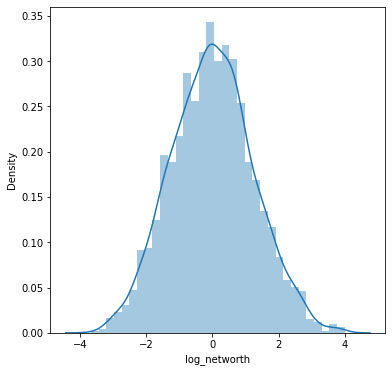

In [14]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.9890854358613185
MSE: 1.5310609562059991
RMSE: 1.2373604794909199


In [16]:
file = open('StackedModelLog.pkl', 'wb')
pickle.dump(final_model, file)

### Without Log 

In [17]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [20]:
 rf_model = pickle.load(open('RandomForestRegressor.pkl', 'rb'))
# ridge_model = pickle.load(open('RidgeRegression.pkl', 'rb'))
svr_model = pickle.load(open('SupportVectorRegressor.pkl', 'rb'))
# xgb_model = pickle.load(open('XGBRegressor.pkl', 'rb'))
dtr_model = pickle.load(open('DecisionTree.pkl', 'rb'))
knn_model = pickle.load(open('KNeighborsRegressor.pkl', 'rb'))

In [21]:
estimators = [
    ('rf_model', rf_model), 
    # ('ridge_model', ridge_model), 
    ('svr_model', svr_model),
    # ('xgb_model', xgb_model),
    ('knn_model', knn_model)
]

In [22]:
final_model = StackingRegressor(
    estimators = estimators, 
    final_estimator = RandomForestRegressor(n_estimators = 15, random_state = 42)
)

In [23]:
final_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2638945843754650.500 total time=   7.7s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2712896011699933.500 total time=   5.9s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2500468769184660.500 total time=   3.9s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2560001517710152.000 total time=   3.9s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900;, score=-2784867297543220.000 total time=   4.5s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=-2631497144255035.000 total time=   5.8s
[CV 2/5] END max_de

StackingRegressor(estimators=[('rf_model',
                               RandomizedSearchCV(cv=5,
                                                  estimator=RandomForestRegressor(),
                                                  n_jobs=1,
                                                  param_distributions={'max_depth': [5,
                                                                                     10,
                                                                                     15,
                                                                                     20,
                                                                                     25,
                                                                                     30],
                                                                       'max_features': ['auto',
                                                                                        'sqrt'],
                             

In [28]:
prediction = final_model.predict(x_test)

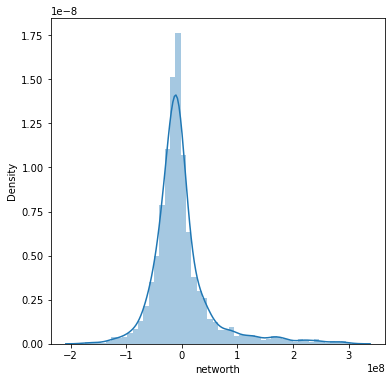

In [25]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction)
plt.show()

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34927080.13134814
MSE: 3032308834369466.5
RMSE: 55066403.86269532


In [27]:
file = open('StackedModel.pkl', 'wb')
pickle.dump(final_model, file)